# AI4ER Guided Team Challenge 2020
## Predicting future trends in building energy usage
### Author: Anna Vaughan
#### Python 3.7.3

In [1]:
# Silence the irritating warnings in the XGBoost library

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
# Import the relevant libraries

import numpy as np 
import pandas as pd 
import xgboost
import shap
import helper_functions
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.mutual_info module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [22]:
# Import the data

predictors, target_heating, target_cooling = helper_functions.clean_data("2012_data.csv")

# Convert from thousands of BTU to KWh
target_heating = target_heating/(3412*1000)
target_cooling = target_cooling/(3412*1000)

#### Model 1: XGBoost
##### Training, hyperparameter tuning and cross validation

In [24]:
# Step 1: grid search CV over max_depth and n_estimators
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Initialise score array
scores = np.zeros((10, 10))

# depths
depth_count = 0
for depth in max_depth:
    # number of estimators
    n_count = 0
    print("Training for depth {}".format(depth))
    for n in n_estimators:
        
        print("Training for {} estimators".format(n))
        
        # Should cross val for the final product, but for now just split
        x_train, x_test, y_train, y_test = train_test_split(predictors, target_heating, test_size=0.2, random_state=5)
        
        # Initialise model
        model = xgboost.XGBRegressor(max_depth = depth, n_estimators = n)
        
        # Fit model 
        model.fit(x_train, y_train, verbose = True)
        
        # Predict and get MSE
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_pred, y_test)
        scores[depth_count, n_count] = mse
        print("MSE for depth {} with {} estimators = {}".format(depth, n, mse))
        
        n_count += 1
    depth_count += 1

Training for depth 3
Training for 50 estimators
MSE for depth 3 with 50 estimators = 0.018105827017215973
Training for 100 estimators


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE for depth 3 with 100 estimators = 0.017181707313425835
Training for 150 estimators


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE for depth 3 with 150 estimators = 0.017004690672800415
Training for 200 estimators


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE for depth 3 with 200 estimators = 0.01692064010940741
Training for 250 estimators


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE for depth 3 with 250 estimators = 0.016948647019016314
Training for 300 estimators


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE for depth 3 with 300 estimators = 0.01703709840830824
Training for 350 estimators


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE for depth 3 with 350 estimators = 0.01709915049222993
Training for 400 estimators


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE for depth 3 with 400 estimators = 0.017164532117431294
Training for 450 estimators


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE for depth 3 with 450 estimators = 0.017171902649184785
Training for 500 estimators


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE for depth 3 with 500 estimators = 0.017143332808747497
Training for depth 4
Training for 50 estimators


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE for depth 4 with 50 estimators = 0.01655747590156503
Training for 100 estimators


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE for depth 4 with 100 estimators = 0.016141294490223383
Training for 150 estimators


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE for depth 4 with 150 estimators = 0.015981176822495835
Training for 200 estimators


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE for depth 4 with 200 estimators = 0.016002019557912903
Training for 250 estimators


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE for depth 4 with 250 estimators = 0.01599022264048642
Training for 300 estimators


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


KeyboardInterrupt: 

[<matplotlib.lines.Line2D at 0x11e8f44e0>,
 <matplotlib.lines.Line2D at 0x11e8f4630>,
 <matplotlib.lines.Line2D at 0x11e8f4780>,
 <matplotlib.lines.Line2D at 0x11e8f48d0>,
 <matplotlib.lines.Line2D at 0x11e8f4a20>]

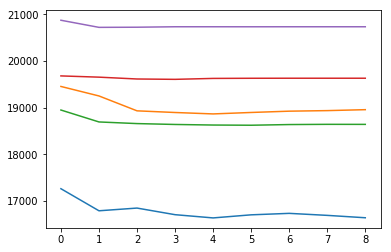

In [8]:
import matplotlib.pyplot as plt
plt.plot(np.transpose(scores[:5, :9]))

In [ ]:
# Pick the best 
depth = 3
n_estimators = 150
model = xgboost.XGBRegressor(max_depth = depth, n_estimators = n_estimators)
model.fit(x_train, y_train, verbose = True)



In [ ]:
# SHAP tree explainers 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(predictors)
shap.summary_plot(shap_values,predictors)


#### Model 2: XGB classifier

(array([1.07e+03, 8.50e+01, 4.70e+01, 4.70e+01, 2.60e+01, 1.40e+01,
        1.50e+01, 5.00e+00, 8.00e+00, 1.20e+01, 6.00e+00, 4.00e+00,
        4.00e+00, 1.00e+01, 2.00e+00, 1.00e+00, 3.00e+00, 1.00e+00,
        3.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 3.00e+00, 0.00e+00,
        1.00e+00, 1.00e+00, 2.00e+00, 2.00e+00, 1.00e+00, 1.00e+00,
        2.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

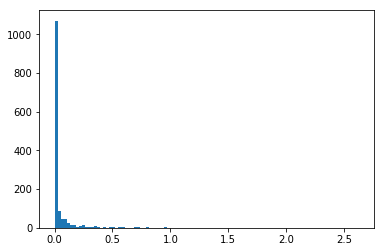

In [26]:
# Examine distribution of targets
plt.hist(target_heating, bins = 100)

In [ ]:
predictors['ELHT2'][predictors['ELHT2']==2]

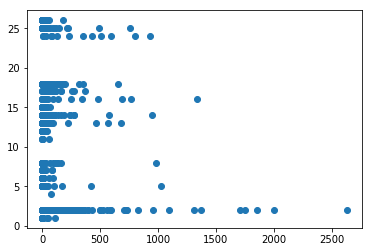

In [16]:
plt.scatter(target_heating[predictors['PBA']<40], predictors['PBA'][predictors['PBA']<40])

In [27]:
predictors, target_heating, target_cooling = helper_functions.clean_data("2012_data.csv")

In [ ]:
plt.scatter